In [1]:
# from settings import  SQL_FOLDER, REDSHIFT_CONN_STR
from datetime import date, datetime, timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import holidays
import pandas as pd
import numpy as np
import lightgbm as lgb

import xgboost as xgb
from xgboost import plot_importance, plot_tree

from pylab import rcParams
# from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


rcParams['figure.figsize'] = 20,12
plt.style.use('fivethirtyeight')
# %matplotlib inline
# Importing all the important libraries which will ease our task later
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
def dataset(data,City,Season='Kharif',Crop='Bajra'):
    df=data.loc[(data['City']==City) & (data['Season']==Season) & (data['Crop']==Crop)]
    return df

In [4]:
def test_train_split(df):
    X=df.drop(['Yield','Production','State','City','Season','Crop','Area'],axis=1,inplace=False)
    target='Yield'
    y=df[target]
    X_train=X[X.index<2009]
    X_test=X[X.index>=2009]
    y_train=y[y.index<2009]
    y_test=y[y.index>=2009]
    return(X_train,X_test,y_train,y_test)

In [5]:
def cleaning_dataset(df):
    df=df[df['Yield']<=6]
    return(df)

In [6]:
data_guj=pd.read_csv(r"C:\Users\User\Desktop\CE202\dataset_final.csv")
data_guj.drop('Unnamed: 0',axis=1,inplace=True)
data_guj.set_index('Year',inplace=True)

In [7]:
city_selected=['Ahmedabad','Kutch','Kheda','Gandhinagar','Rajkot','Surat']
crop_selected=['Bajra','Arhar/Tur','Wheat','Jowar','Potato','Groundnut']

In [8]:
df = data_guj.loc[(data_guj['City'] == 'Ahmedabad') | (data_guj['City'] == 'Kutch') | (data_guj['City']=='Kheda') | (data_guj['City']=='Gandhinagar')|(data_guj['City']=='Rajkot')|(data_guj['City']=='Surat')]
df = df.loc[(df['Crop']=='Bajra')|(df['Crop']=='Arhar/Tur')|(df['Crop']=='Wheat')|(df['Crop']=='Jowar')|(df['Crop']=='Potato')|(df['Crop']=='Groudnut')]

In [9]:
def best_pca_components(X):
    scaler = StandardScaler()
    X_st = scaler.fit_transform(X)
    
    pca = PCA(n_components = len(X.columns))
    pca.fit(X_st)
    X_pca = pca.transform(X_st)
    exp_variance = np.cumsum(pca.explained_variance_ratio_)
    exp_variance = pd.DataFrame(exp_variance)
    best_components = exp_variance[exp_variance>=0.90]
    best_components = best_components.dropna()
    return min(list(best_components.index))

Text(0.5, 1, 'Entire Gujurat - All cities, season and Crop data')

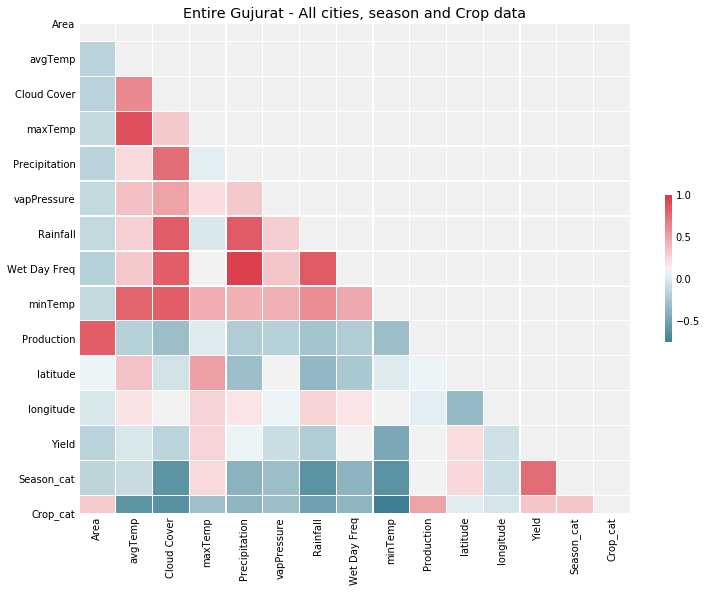

In [11]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap,linewidths=.3, cbar_kws={"shrink": .3})
plt.title("Entire Gujurat - All cities, season and Crop data")

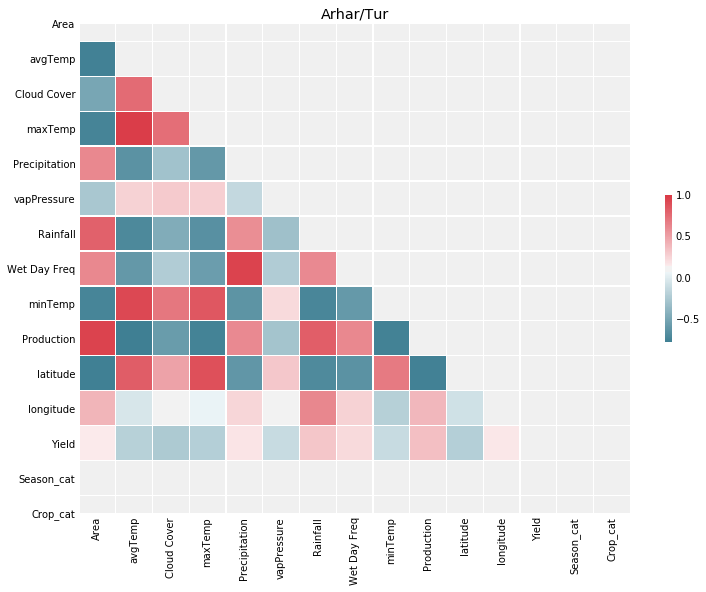

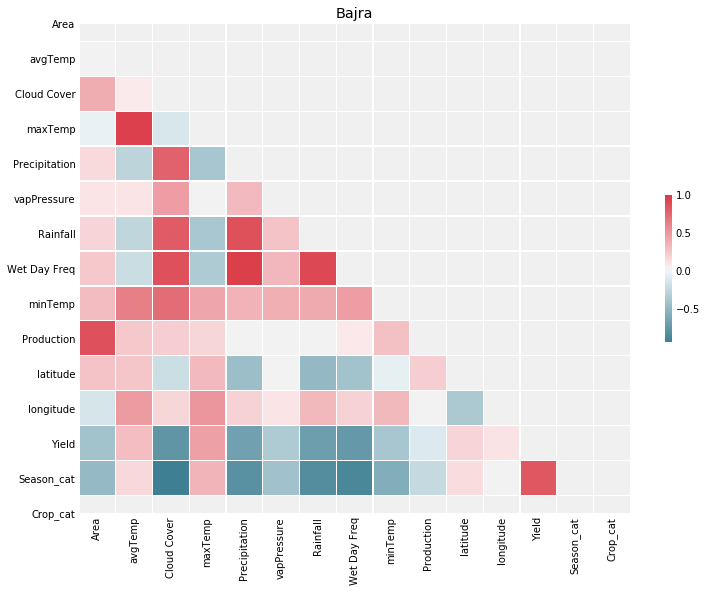

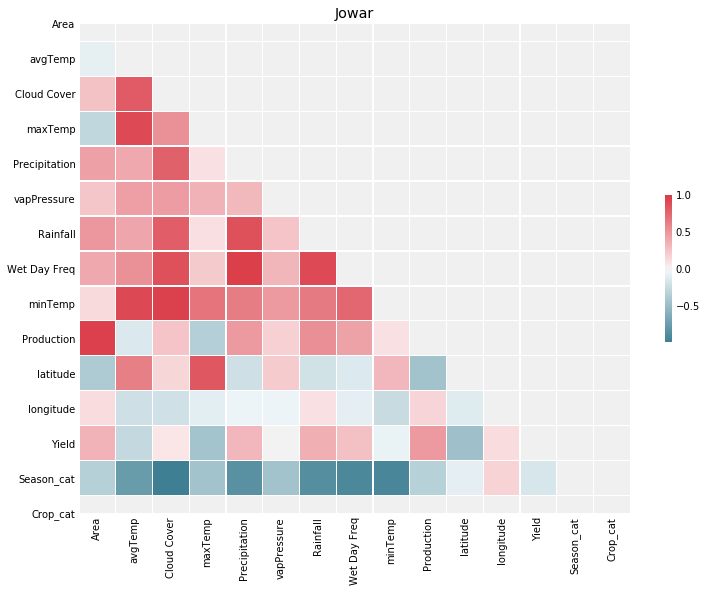

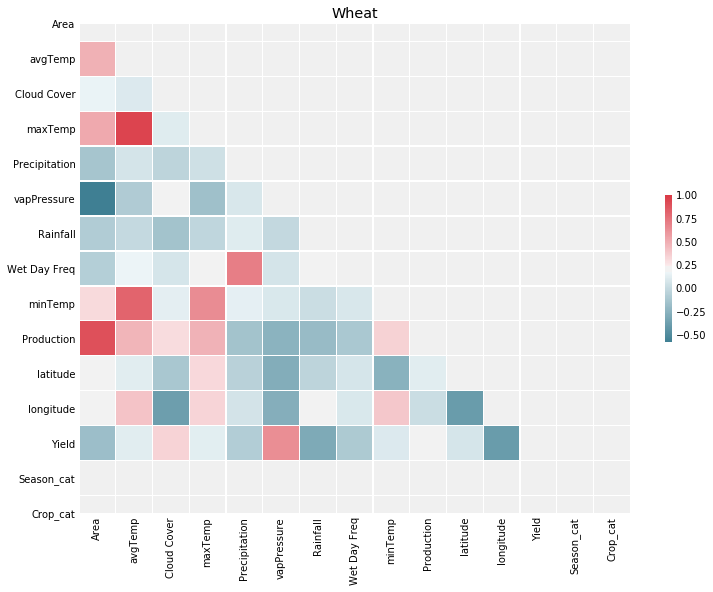

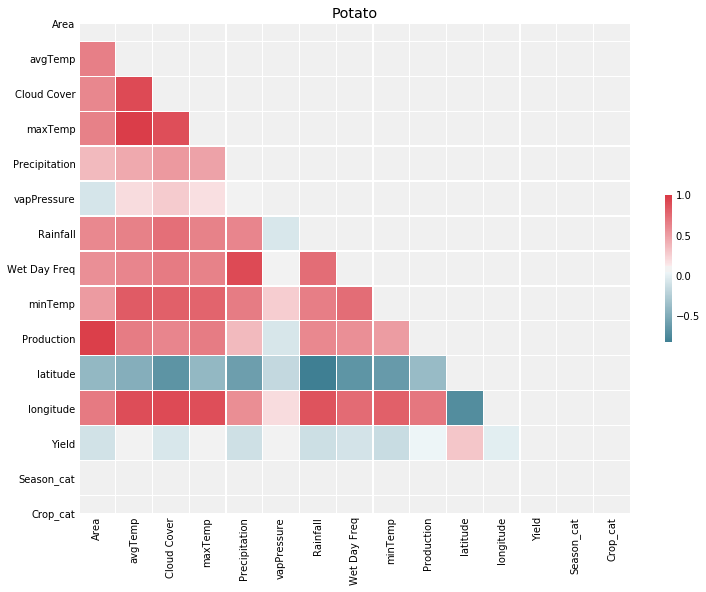

In [12]:
for crop in list(df['Crop'].unique()):
    try:
        df_1=df[df.Crop==crop]
        # Compute the correlation matrix
        corr = df_1.corr()

        # Generate a mask for the upper triangle
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

        # Set up the matplotlib figure
        f, ax = plt.subplots(figsize=(11, 9))

        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(220, 10, as_cmap=True)

        # Draw the heatmap with the mask and correct aspect ratio
        ax.set_title(str(crop))
        sns.heatmap(corr, mask=mask,cmap=cmap,linewidths=.3, cbar_kws={"shrink": .3})
    except:
        continue

In [14]:
rcParams['figure.figsize'] = 20,12
plt.style.use('fivethirtyeight')

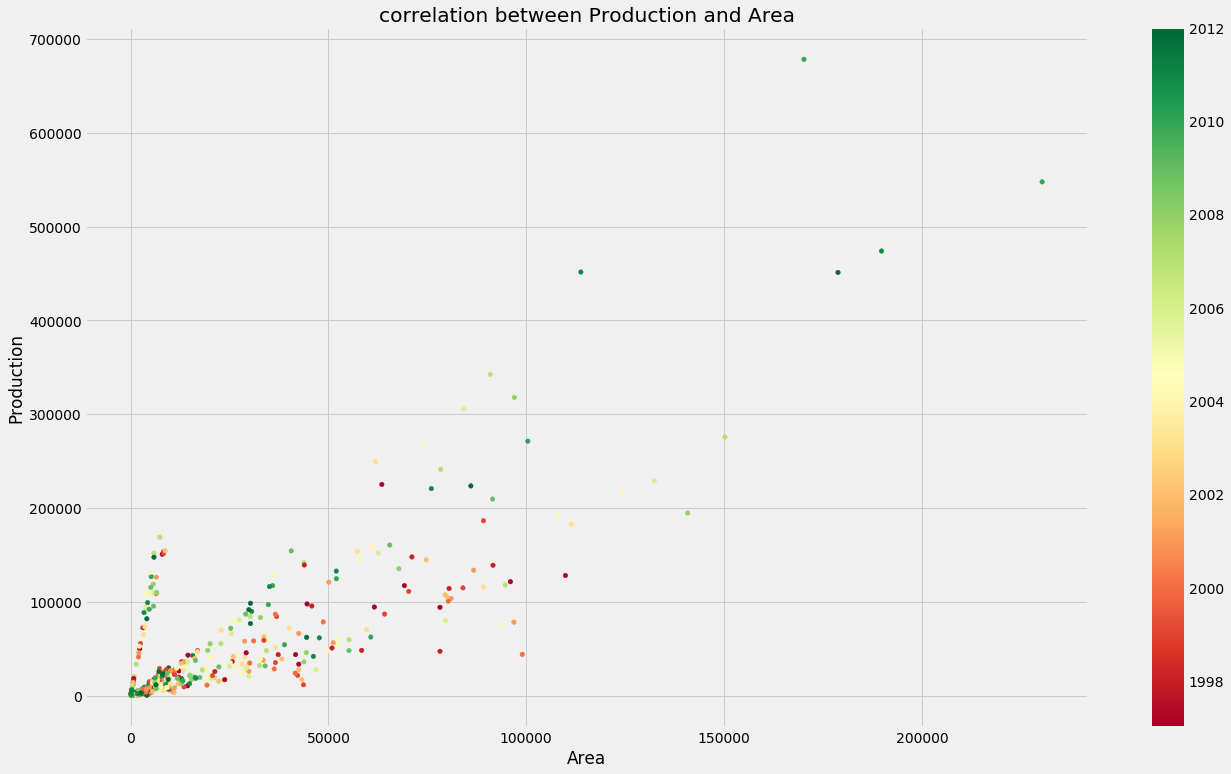

<Figure size 1584x792 with 0 Axes>

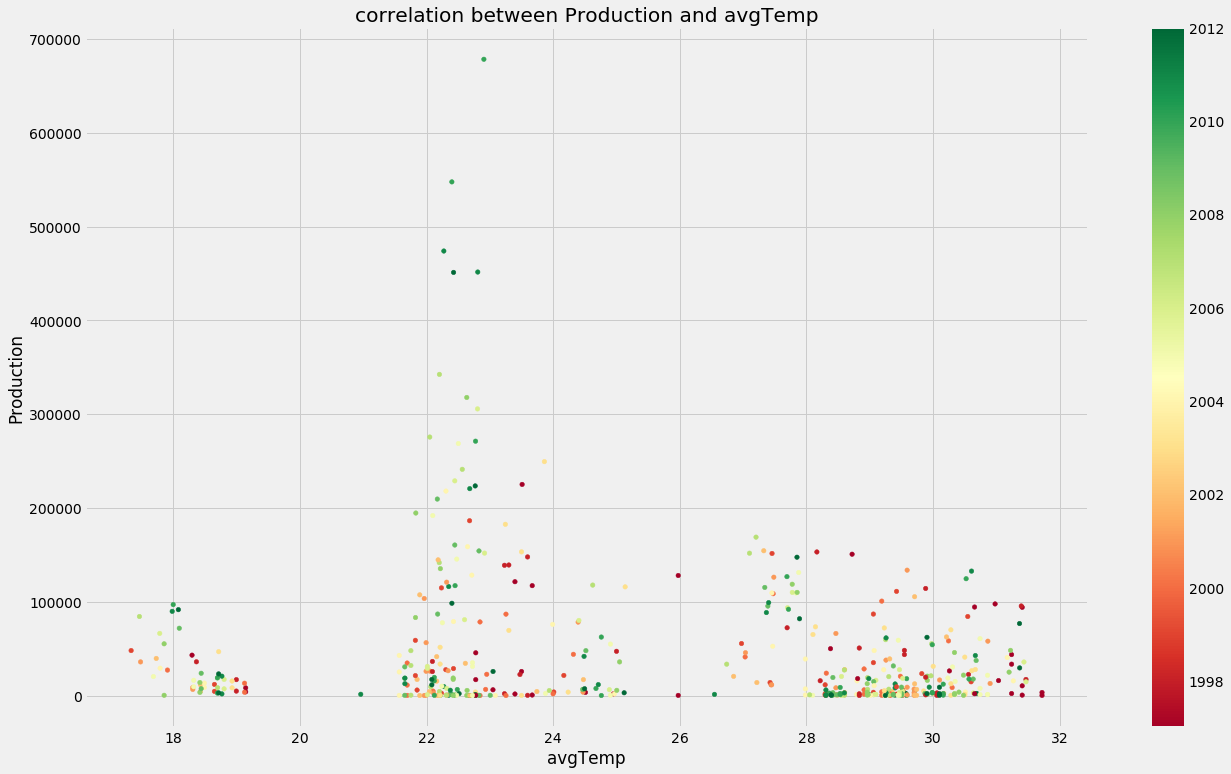

<Figure size 1584x792 with 0 Axes>

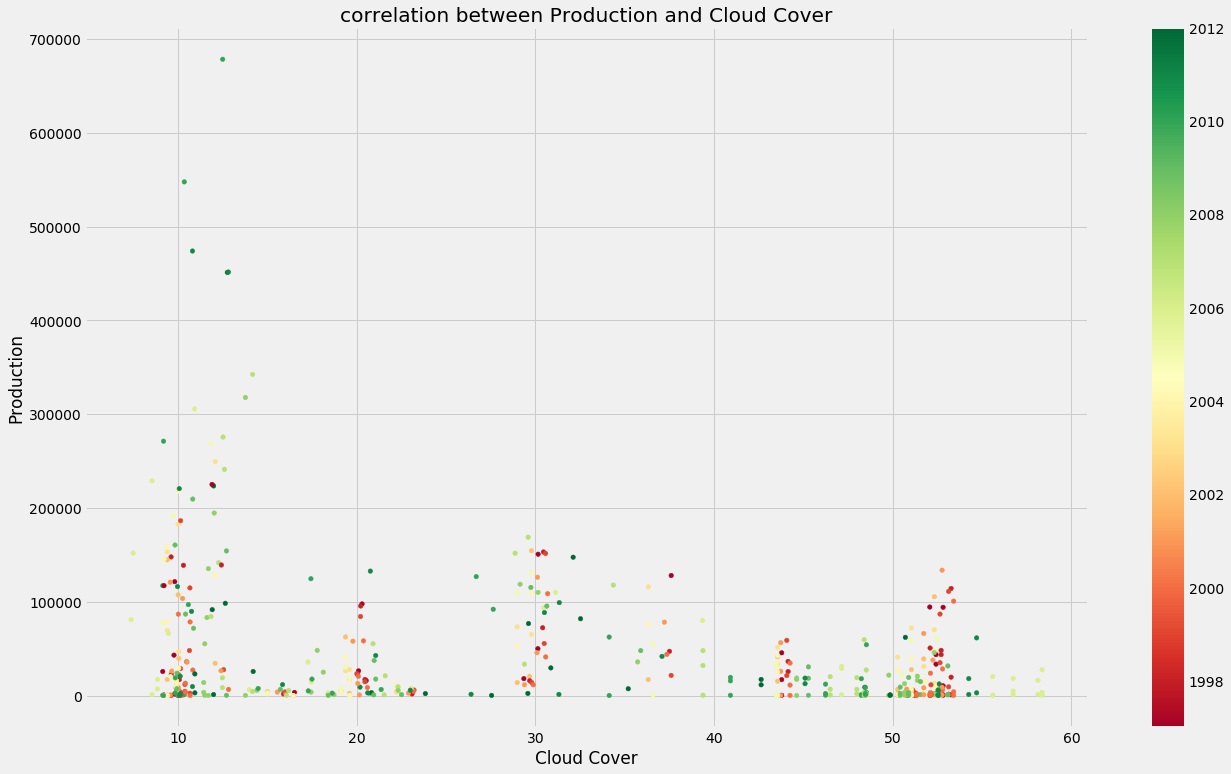

<Figure size 1584x792 with 0 Axes>

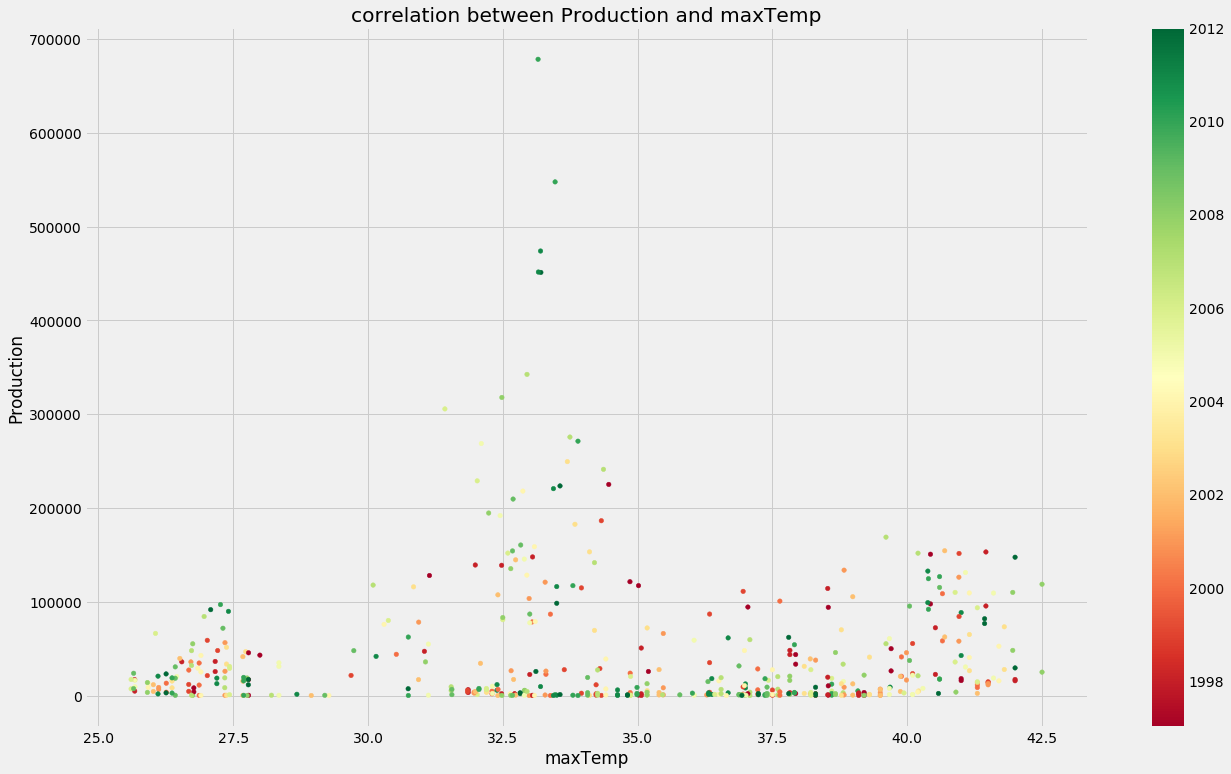

<Figure size 1584x792 with 0 Axes>

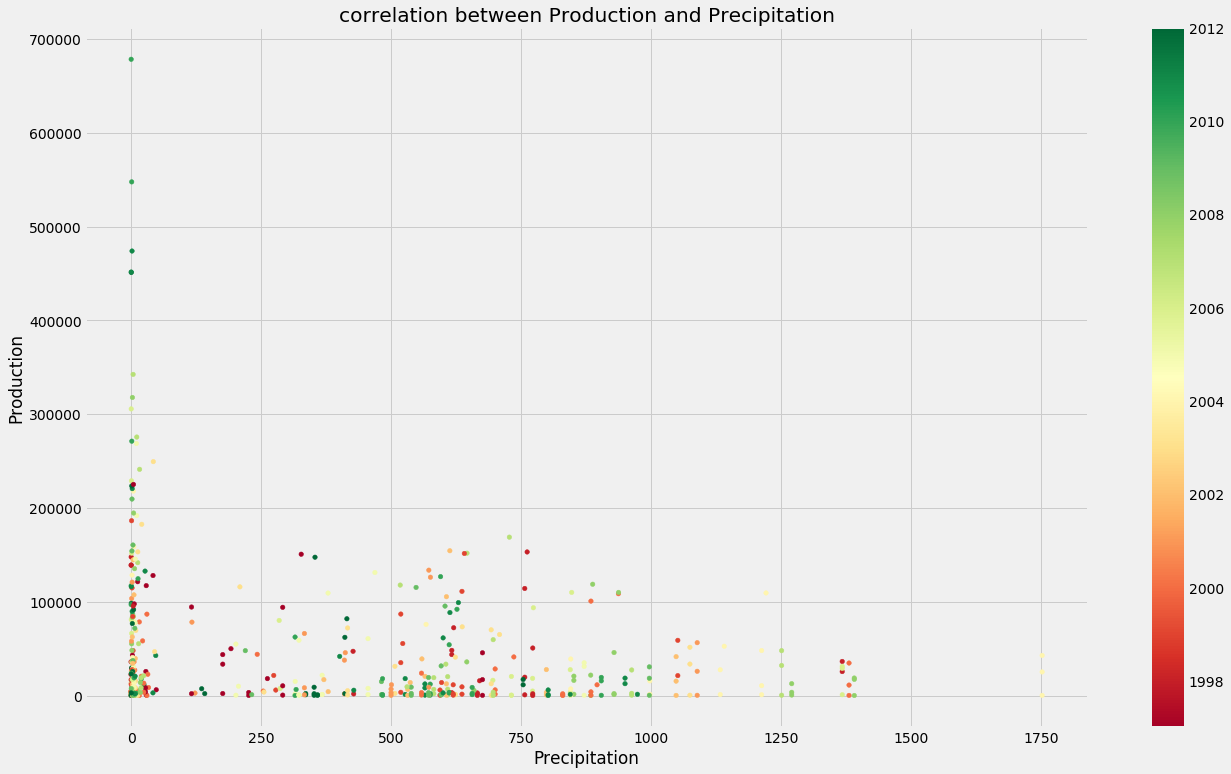

<Figure size 1584x792 with 0 Axes>

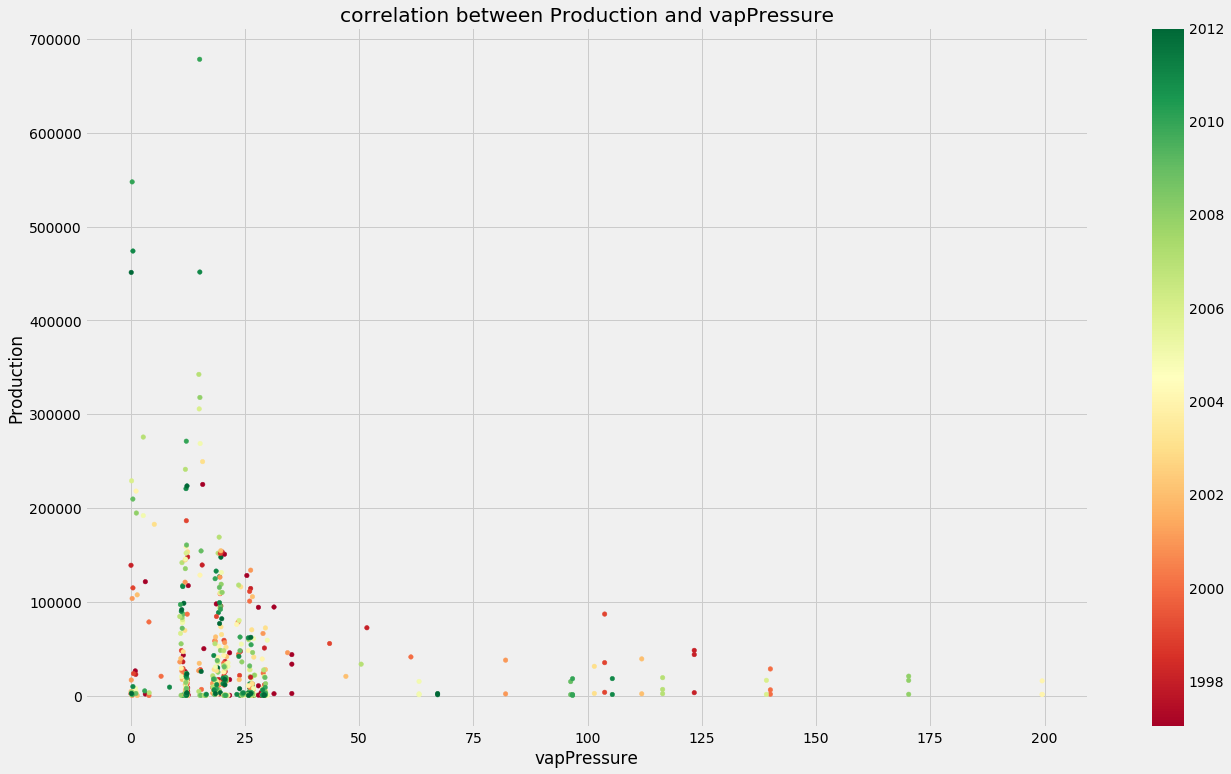

<Figure size 1584x792 with 0 Axes>

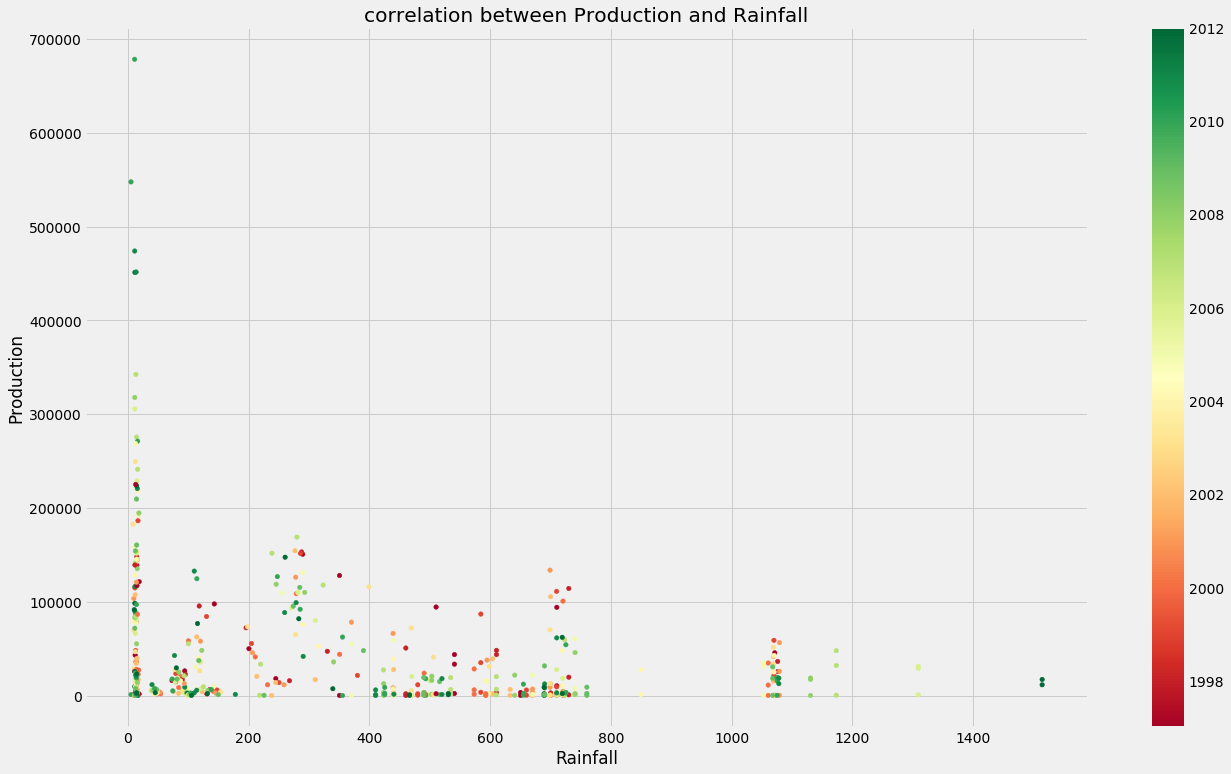

<Figure size 1584x792 with 0 Axes>

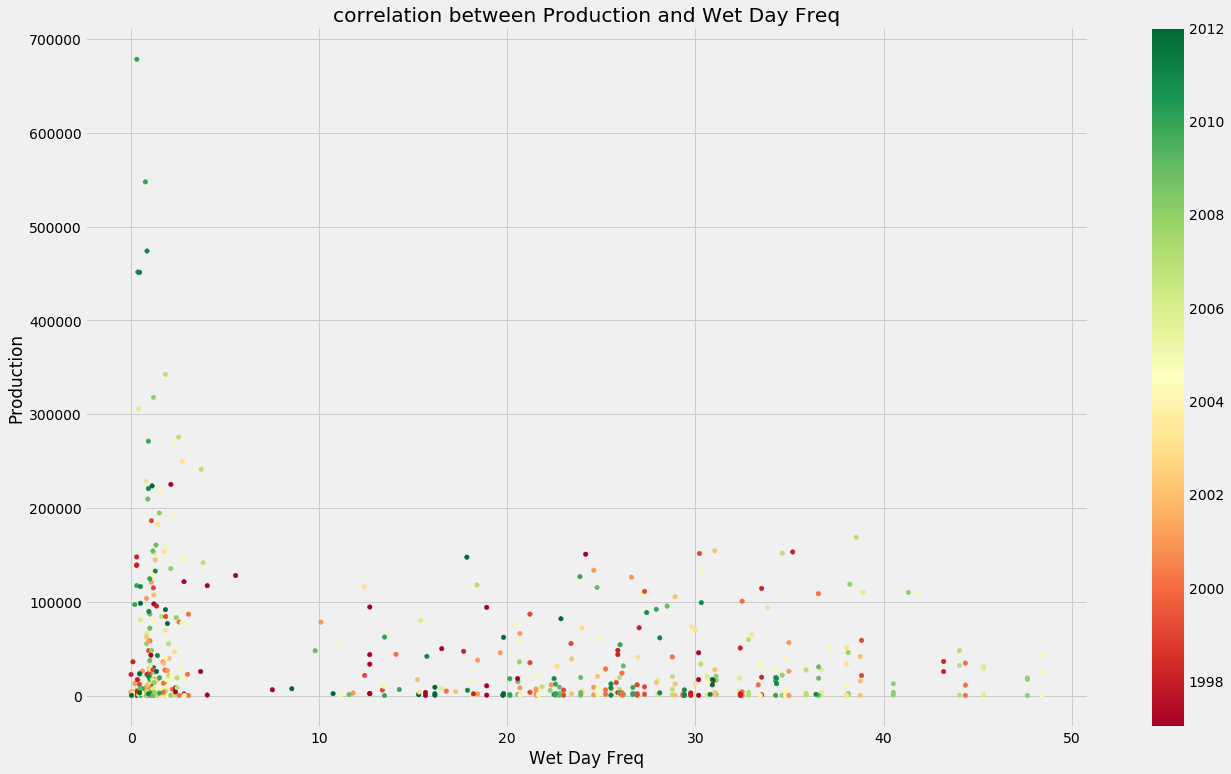

<Figure size 1584x792 with 0 Axes>

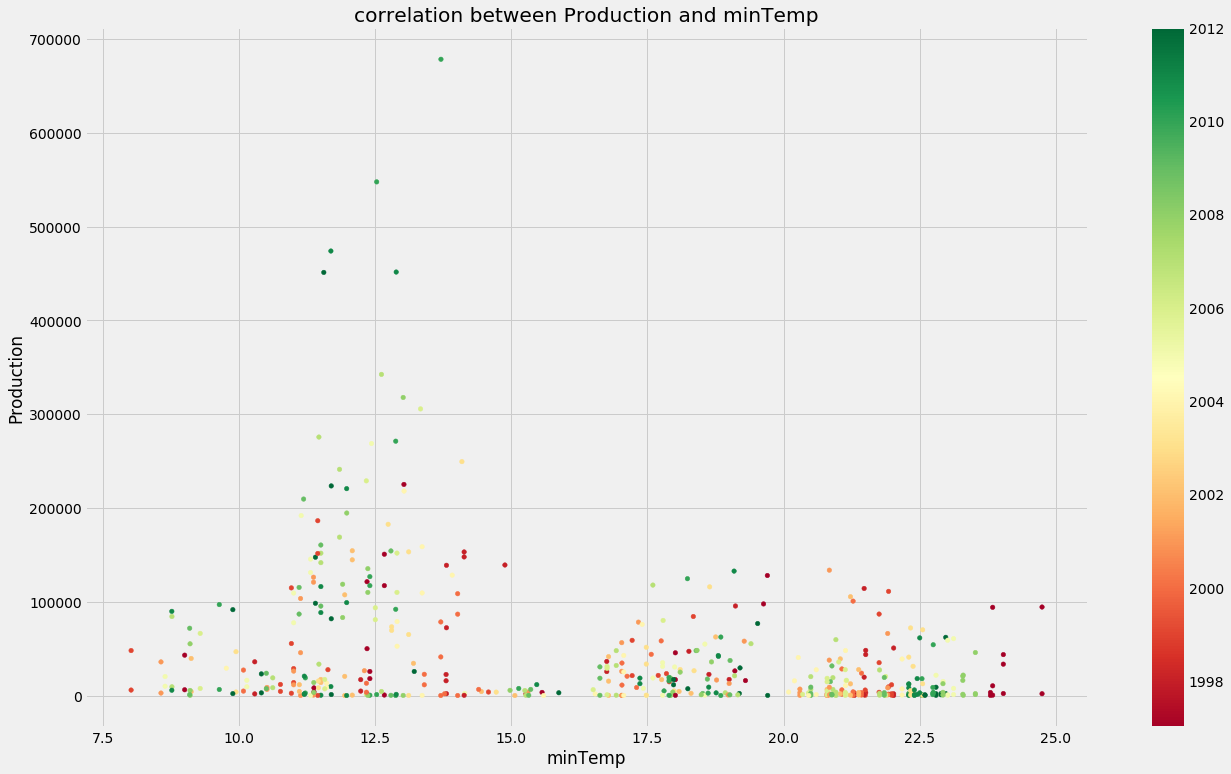

<Figure size 1584x792 with 0 Axes>

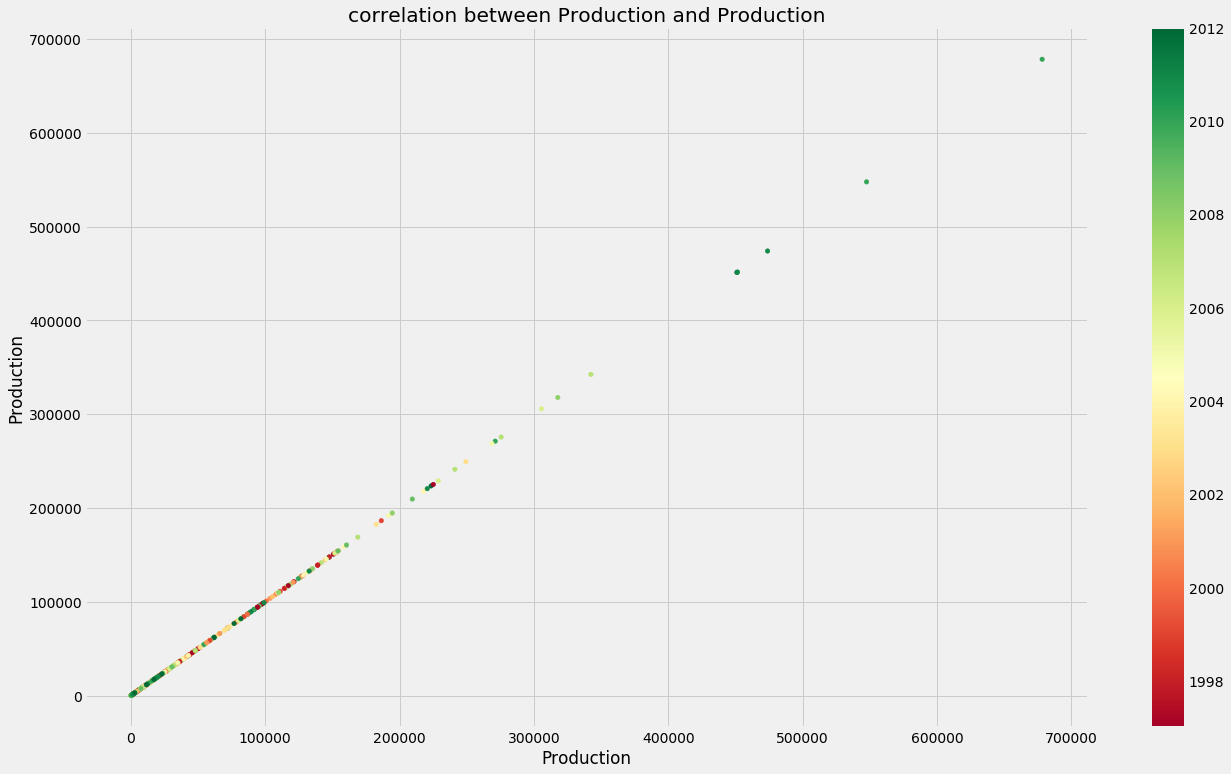

<Figure size 1584x792 with 0 Axes>

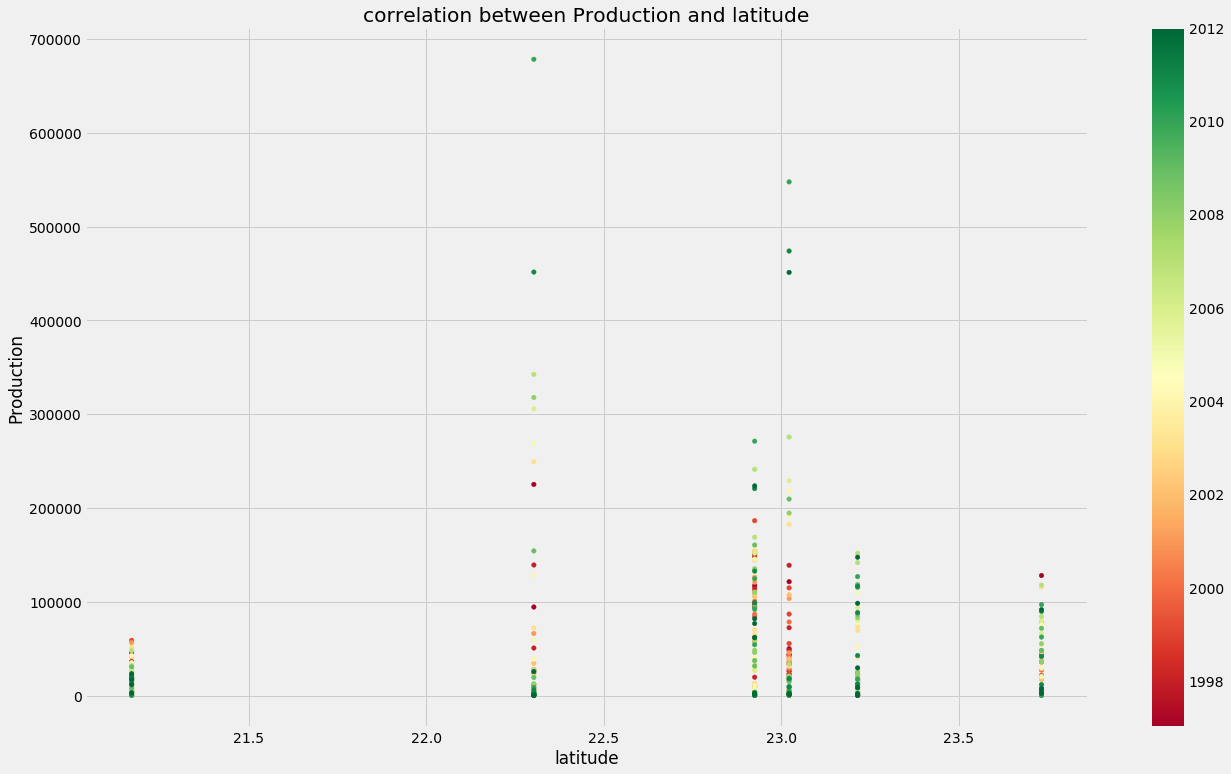

<Figure size 1584x792 with 0 Axes>

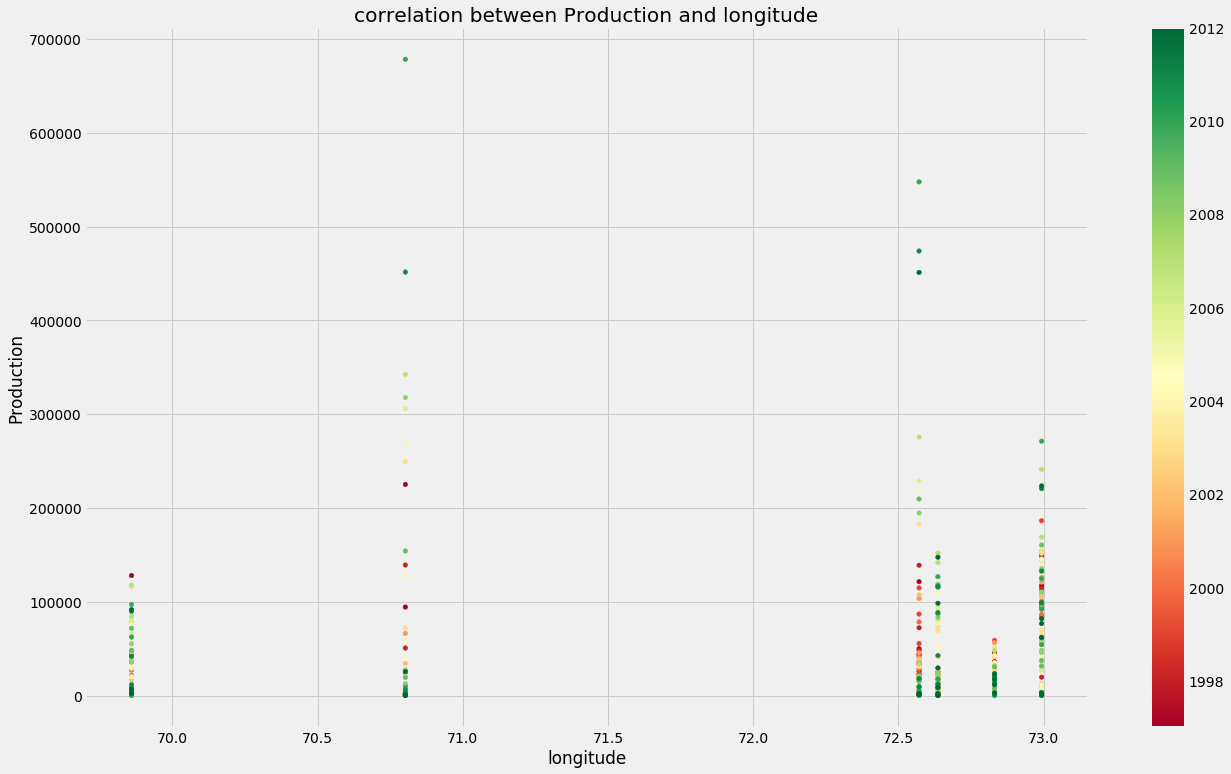

<Figure size 1584x792 with 0 Axes>

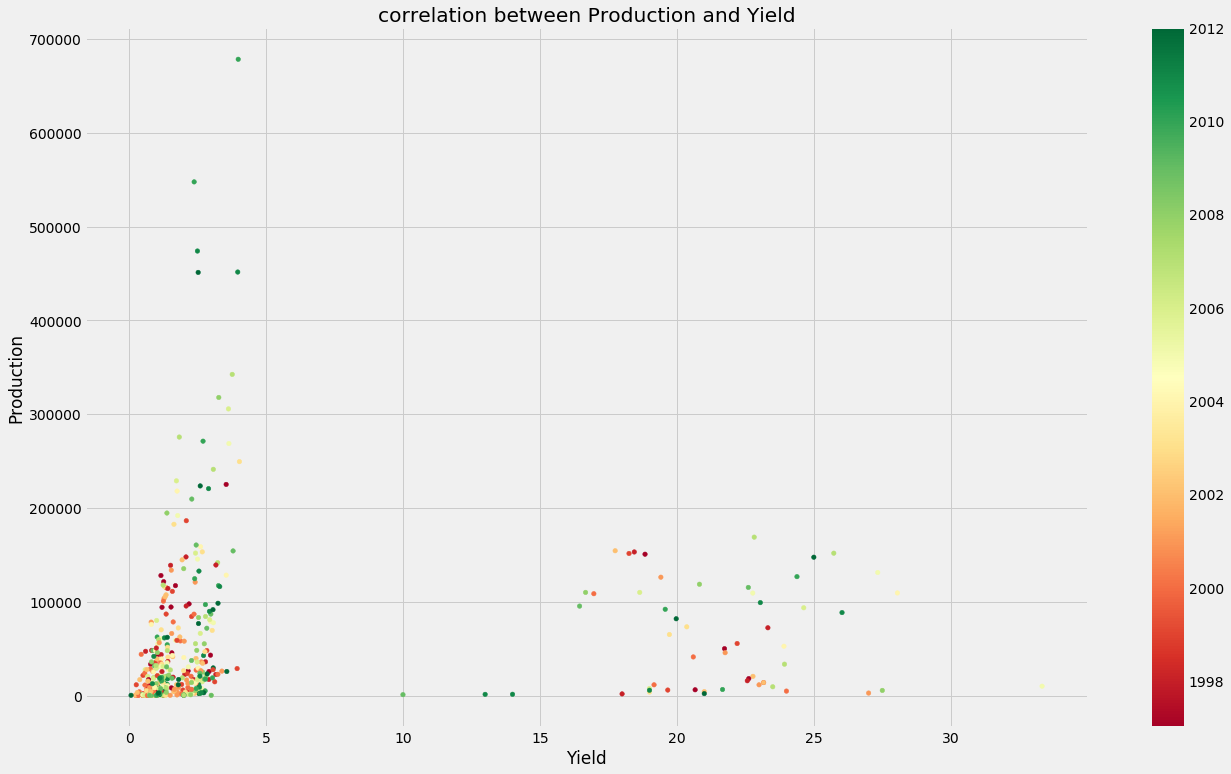

<Figure size 1584x792 with 0 Axes>

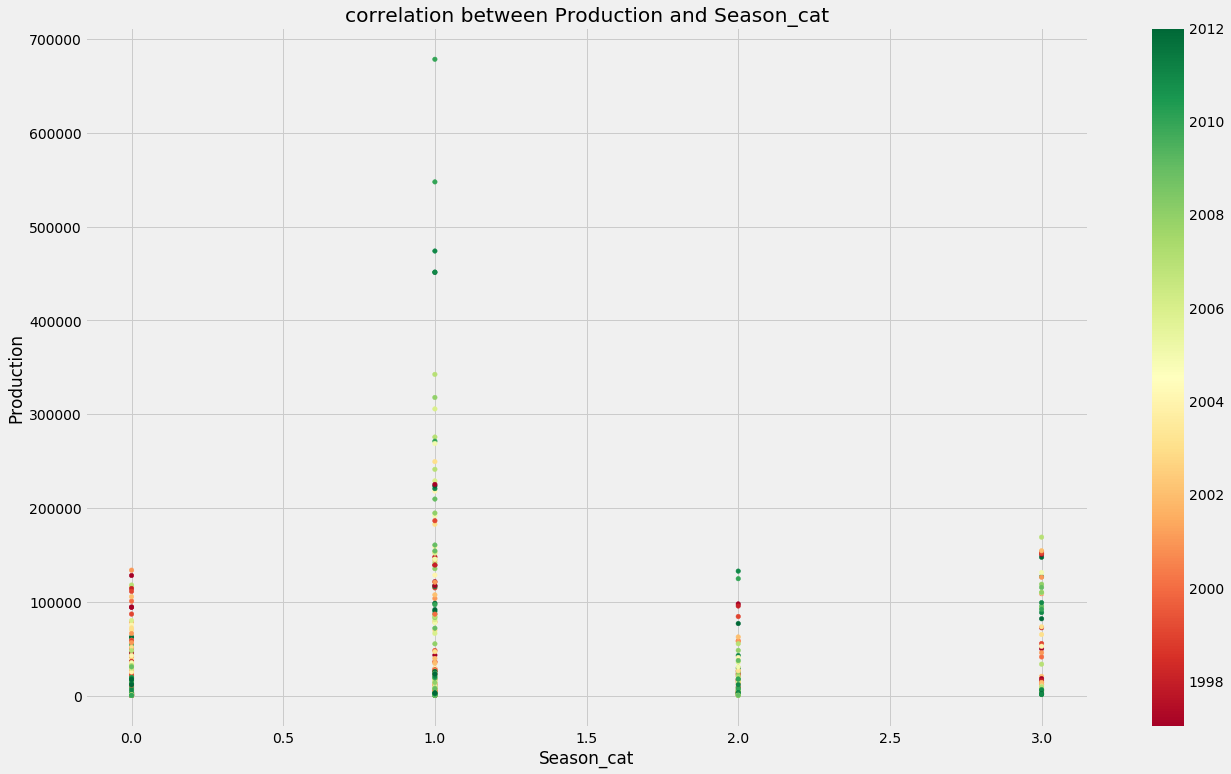

<Figure size 1584x792 with 0 Axes>

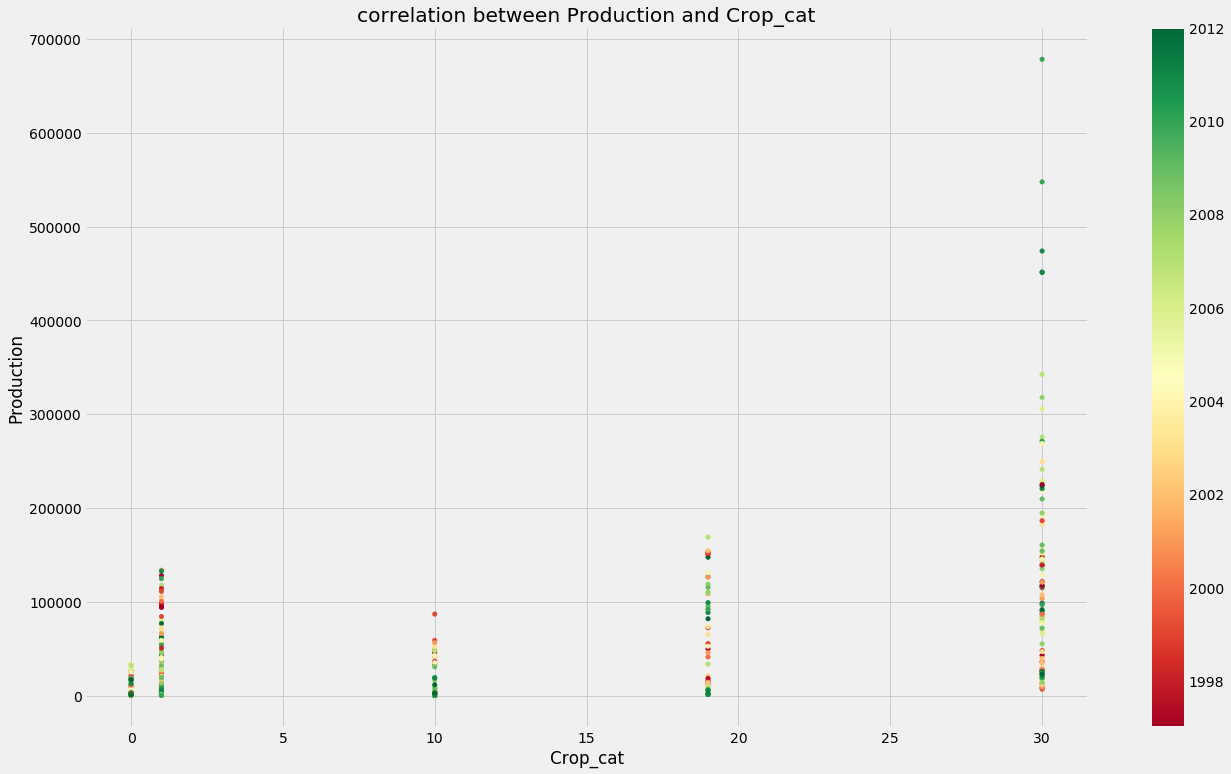

<Figure size 1584x792 with 0 Axes>

In [15]:
for col in df.select_dtypes(include=np.number):
        df.plot(kind='scatter', 
                    x=col, y='Production',
                    title=f'correlation between Production and {col}', 
                    cmap='RdYlGn',
                    c=df.index
                   )
        plt.figure(figsize=(22,11))
        plt.show()

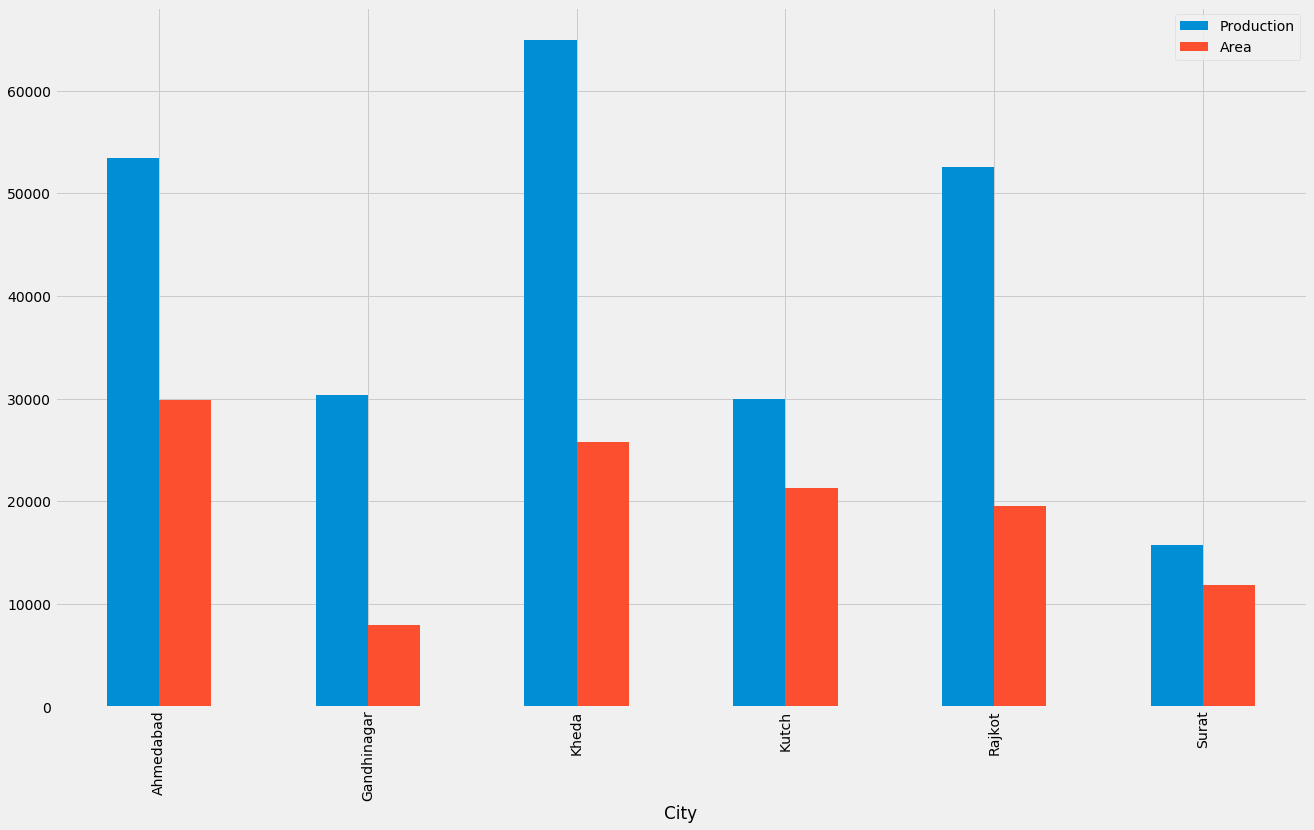

In [16]:
df[['Production','Area','City']].groupby('City').mean().plot(kind='bar')

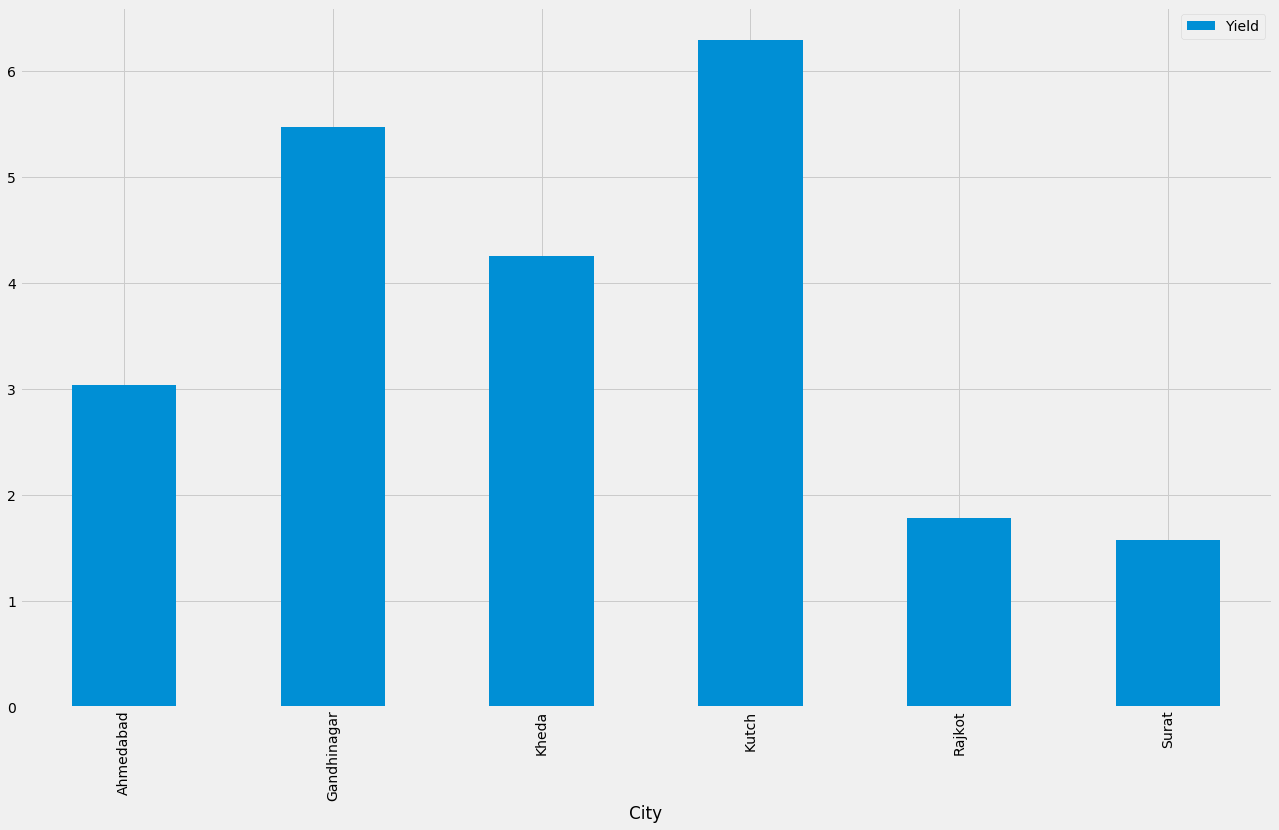

In [17]:
df[['Yield','City']].groupby('City').mean().plot(kind='bar')

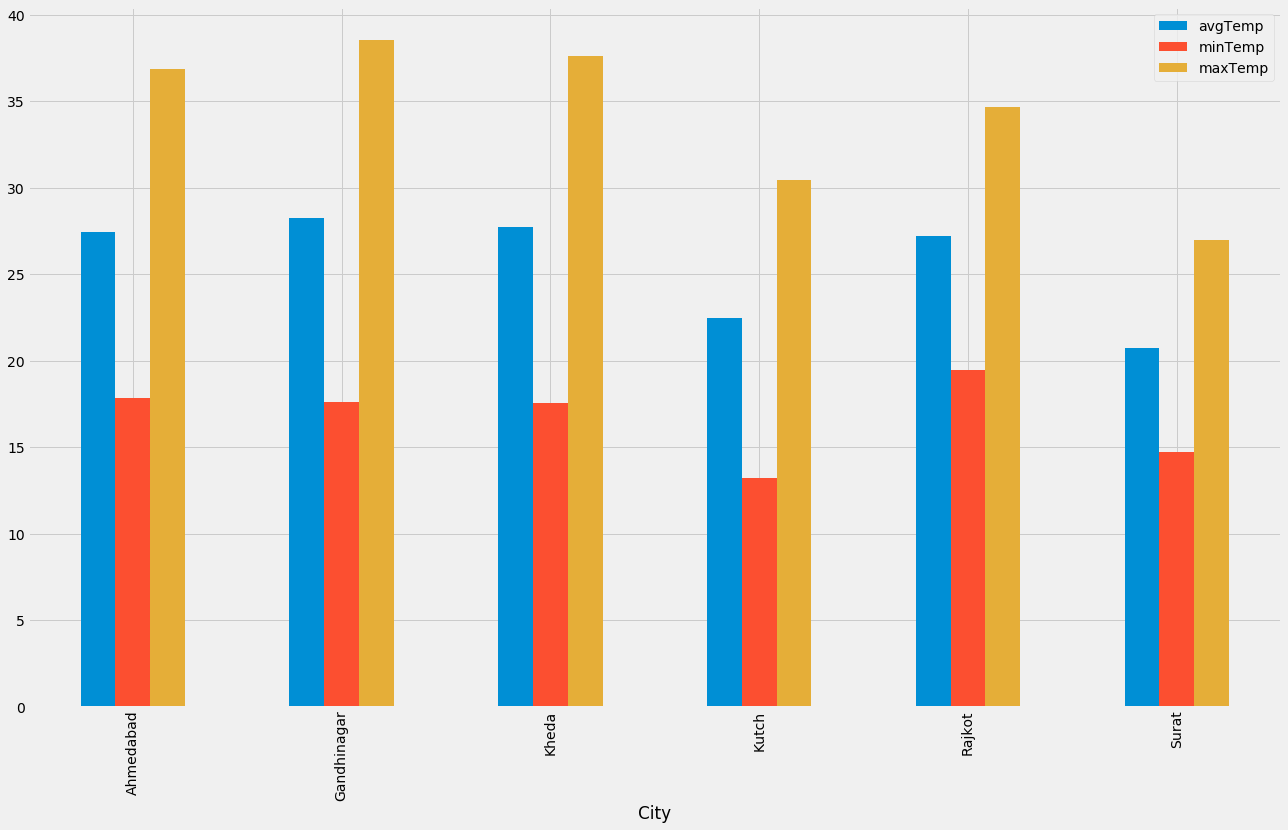

In [18]:
df[['avgTemp','minTemp','maxTemp','City']].groupby('City').mean().plot(kind='bar')

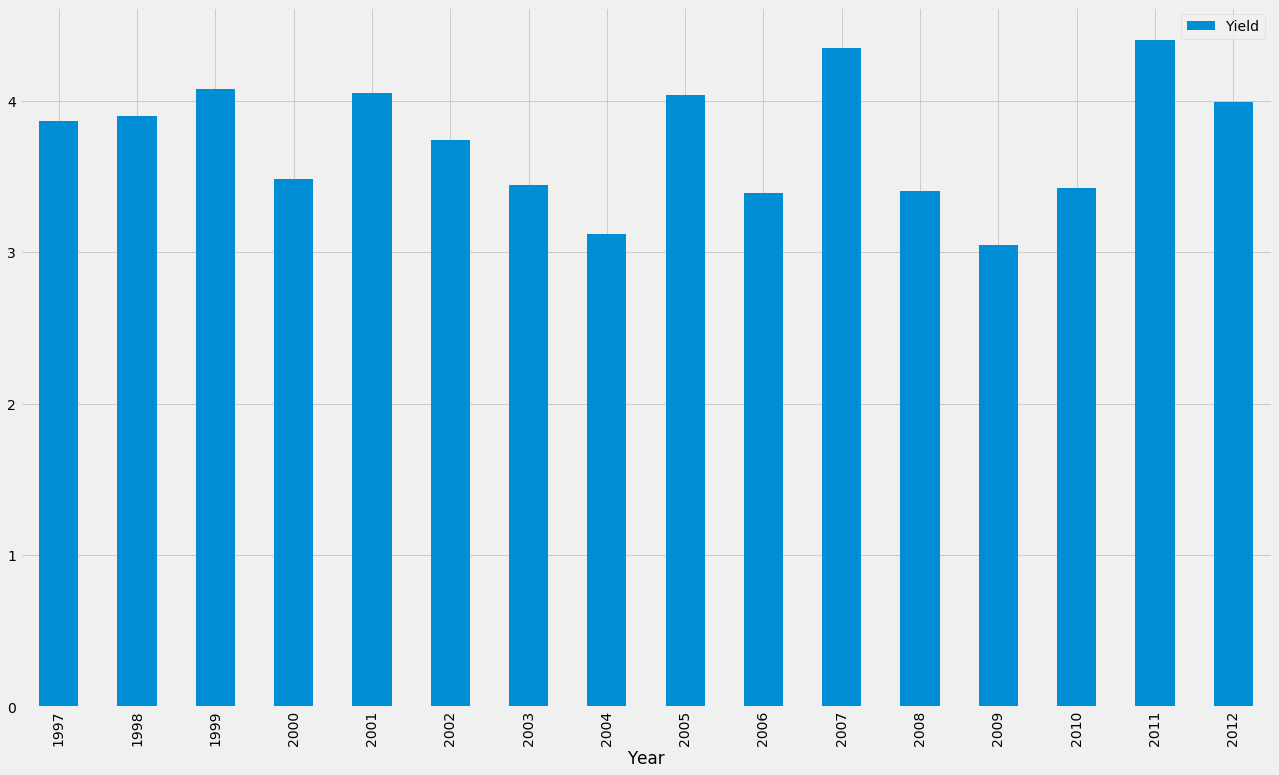

In [20]:
df[['Yield']].groupby(df.index).mean().plot(kind='bar')

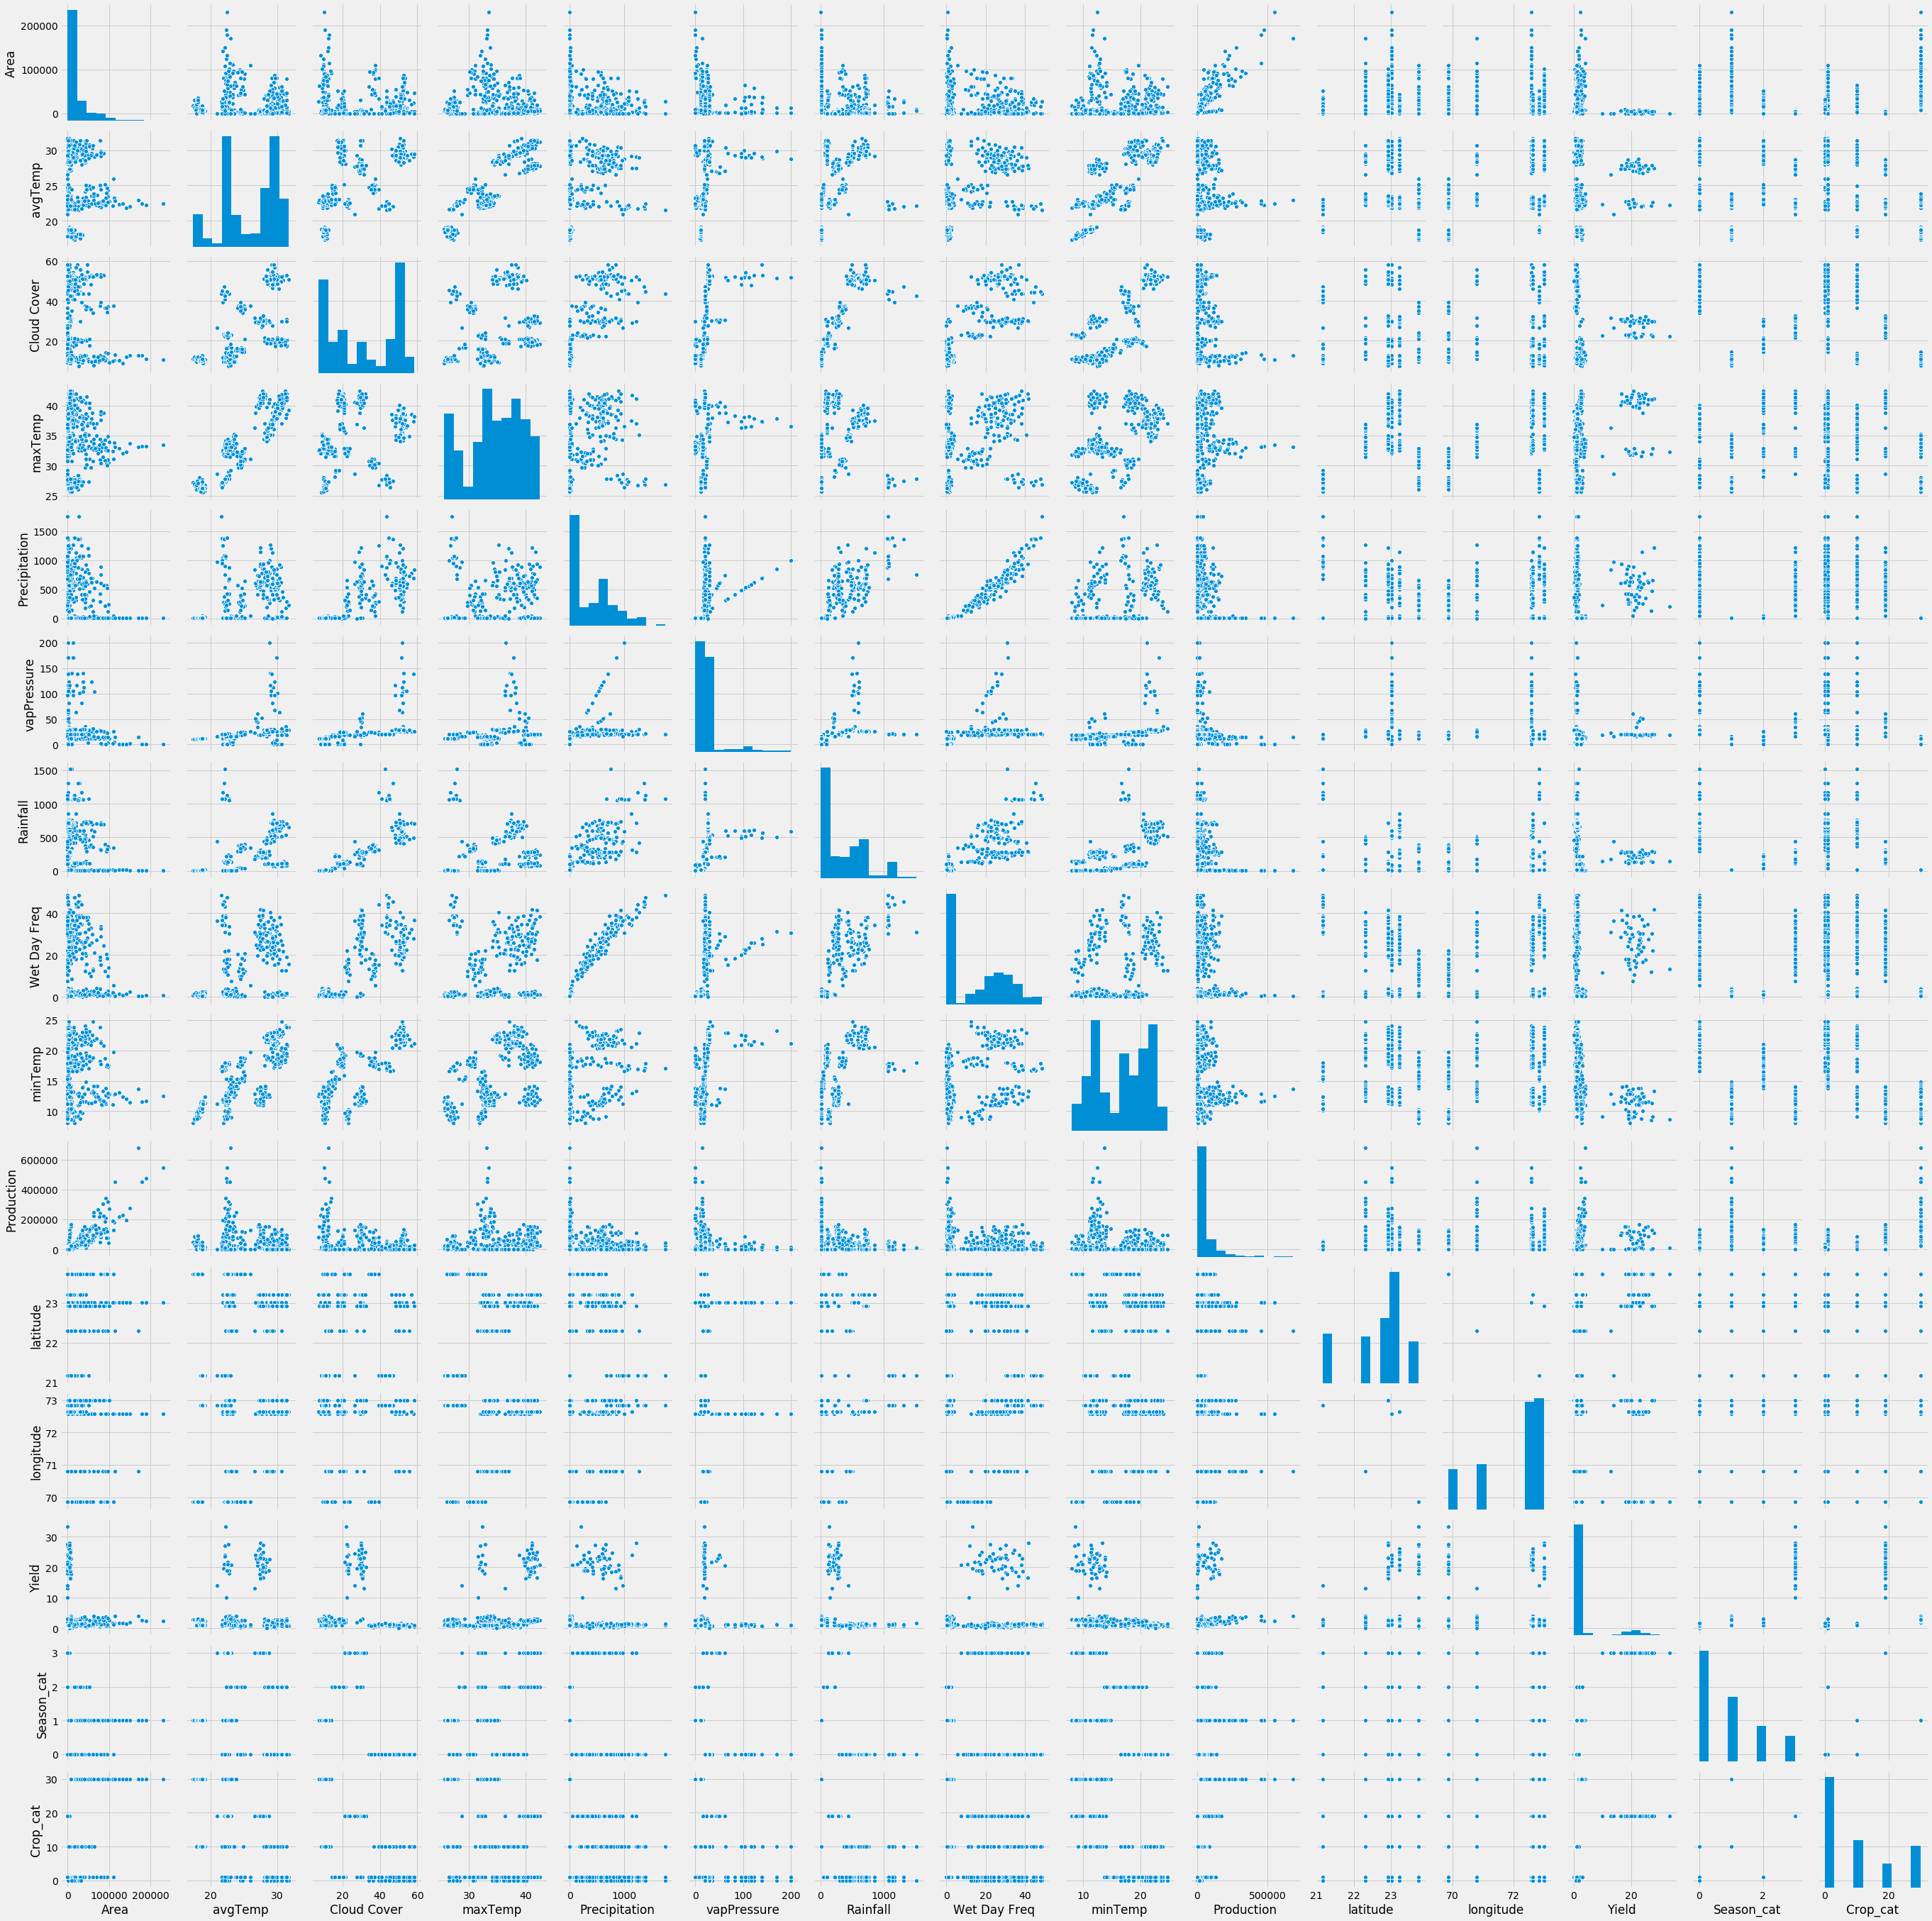

In [21]:
sns.pairplot(df)